## Datos para reporte anual de vivienda

El presente notebook se calcularán los datos necesarios para el reporte anual de vivienda. Los datos se obtendrán de la API del Sistema Nacional de Información e Indicadores de Vivienda (SNIIV) de la Secretaría de Desarrollo Agrario, Territorial y Urbano (SEDATU) así como del INEGI.

## Instalar paquetes 


In [162]:
!pip install geopandas
!pip install funciones

In [213]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import locale
import geopandas as gpd
import funciones
import time
from pandas.api.types import CategoricalDtype
from matplotlib import ticker

In [114]:
#Evitar notación científica
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [115]:
# Opcionalmente, puedes restaurar las opciones a sus valores predeterminados:
#pd.reset_option('display.max_columns')
#pd.reset_option('display.max_rows')

In [116]:
# Configurar pandas para mostrar todas las columnas y filas sin truncar
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

##  1) Etorno Macroeconómico



#### Indicador Global de la Actividad Económica (IGAE)
- Gráfica 1. Variación anual del Indicador Global de la Actividad Económica (IGAE)

In [156]:
# URL con token del la variación anual del igae
url_igae = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/737221/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_igaec = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/737256/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"

# Hacer la solicitud HTTP a la URL
response_indica = requests.get(url_igae)
response_indicac = requests.get(url_igaec)

# Convertir la respuesta en JSON
data_igae = response_indica.json()
data_igaec = response_indicac.json()

In [157]:
# Usar las columnas TIME_PERIOD y OBS_VALUE
df_igae = pd.DataFrame(data_igae["Series"][0]["OBSERVATIONS"])
df_igaec = pd.DataFrame(data_igaec["Series"][0]["OBSERVATIONS"])

In [158]:
#Ver el tipo de variables de los df
df_igae.info()
df_igaec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TIME_PERIOD    362 non-null    object
 1   OBS_VALUE      362 non-null    object
 2   OBS_EXCEPTION  362 non-null    object
 3   OBS_STATUS     362 non-null    object
 4   OBS_SOURCE     362 non-null    object
 5   OBS_NOTE       0 non-null      object
 6   COBER_GEO      362 non-null    object
dtypes: object(7)
memory usage: 19.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TIME_PERIOD    362 non-null    object
 1   OBS_VALUE      362 non-null    object
 2   OBS_EXCEPTION  362 non-null    object
 3   OBS_STATUS     362 non-null    object
 4   OBS_SOURCE     362 non-null    object
 5   OBS_NOTE       0 non-null      object
 6   COBER_GEO      

In [159]:
#Convertir los tipos de datos de caracteres a fecha y numericas
df_igae['TIME_PERIOD'] = pd.to_datetime(df_igae['TIME_PERIOD'])
df_igae['OBS_VALUE'] = pd.to_numeric(df_igae['OBS_VALUE'])

df_igaec['TIME_PERIOD'] = pd.to_datetime(df_igaec['TIME_PERIOD'])
df_igaec['OBS_VALUE'] = pd.to_numeric(df_igaec['OBS_VALUE'])

# Obtener datos de las fechas requeridas 2023-01 a 2023-12
df_igae = df_igae.loc[(df_igae['TIME_PERIOD'] >= '2021-01') & (df_igae['TIME_PERIOD'] < '2023-12')]
df_igaec = df_igaec.loc[(df_igaec['TIME_PERIOD'] >= '2021-01') & (df_igaec['TIME_PERIOD'] < '2023-12')]

# Filtrar las columnas 'TIME_PERIOD' y 'OBS_VALUE' solamente
df_igae = df_igae[['TIME_PERIOD', 'OBS_VALUE']]
df_igaec = df_igaec[['TIME_PERIOD', 'OBS_VALUE']]

C:\Users\hp\AppData\Local\Temp\ipykernel_18740\752146689.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_igae['TIME_PERIOD'] = pd.to_datetime(df_igae['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_18740\752146689.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_igaec['TIME_PERIOD'] = pd.to_datetime(df_igaec['TIME_PERIOD'])


In [160]:
# Renombrar las columnas en los DataFrames
df_igae.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Total'}, inplace=True)
df_igaec.rename(columns={'OBS_VALUE': 'Construccion'}, inplace=True)

# Crear el DataFrame igae con las variables del DataFrame df_igae
igae = df_igae[['Fecha', 'Total']].copy()

# Agregar la variable de construcción desde el DataFrame df_igaec
igae['Construccion'] = df_igaec['Construccion']
igae

,Fecha,Total,Construccion
3,2023-11-01,2.69,19.38
4,2023-10-01,3.49,27.11
5,2023-09-01,3.83,19.73
6,2023-08-01,3.58,29.16
7,2023-07-01,3.67,22.98
8,2023-06-01,4.04,21.16
9,2023-05-01,3.37,16.17
10,2023-04-01,2.79,4.03
11,2023-03-01,2.67,5.05
12,2023-02-01,3.18,3.48


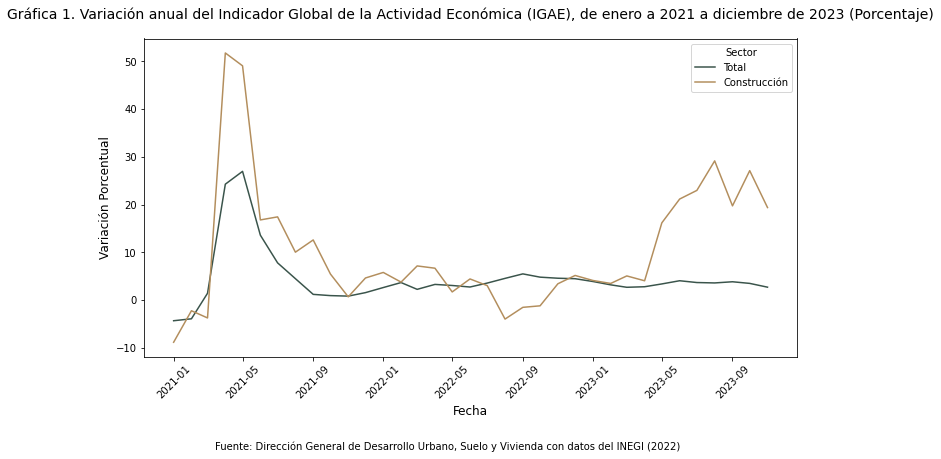

In [161]:
import matplotlib.pyplot as plt

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar la variable 'Total'
plt.plot(igae['Fecha'], igae['Total'], color='#3a544b', label='Total')

# Graficar la variable 'Construccion'
plt.plot(igae['Fecha'], igae['Construccion'], color='#b38e5d', label='Construcción')

# Añadir título y etiquetas de ejes
plt.title('Gráfica 1. Variación anual del Indicador Global de la Actividad Económica (IGAE), de enero a 2021 a diciembre de 2023 (Porcentaje)', fontsize=14, loc='center', pad=20)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Variación Porcentual', fontsize=12)

# Añadir leyenda
plt.legend(title='Sector', fontsize=10)

# Añadir fuente
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2022)', ha='center', fontsize=10)

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

#### Inversión Fija Bruta (IFB)
- Gráfica 2. Variación anual de la Inversión Fija Bruta (IFB) de la construcción



In [123]:
# URL con token del ifb variación anual desestacionalizada
url_ifb =       "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/741160/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_ifb_resi =  "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/741167/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_ifb_nresi = "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/741174/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"

# Hacer la solicitud HTTP a la URL
response_ifb = requests.get(url_ifb)
response_ifb_resi = requests.get(url_ifb_resi)
response_ifb_nresi = requests.get(url_ifb_nresi)

# Convertir la respuesta en JSON
data_ifb = response_ifb.json()
data_ifb_resi = response_ifb_resi.json()
data_ifb_nresi = response_ifb_nresi.json()

In [124]:
# Crear dataframes de pandas a partir de los datos JSON
df_ifb = pd.DataFrame(data_ifb["Series"][0]["OBSERVATIONS"])
df_ifb_resi = pd.DataFrame(data_ifb_resi["Series"][0]["OBSERVATIONS"])
df_ifb_nresi = pd.DataFrame(data_ifb_nresi["Series"][0]["OBSERVATIONS"])

In [125]:
#Usar las columnas necesarias
df_ifb = df_ifb[['TIME_PERIOD', 'OBS_VALUE']]
df_ifb_resi = df_ifb_resi[['TIME_PERIOD', 'OBS_VALUE']]
df_ifb_nresi = df_ifb_nresi[['TIME_PERIOD', 'OBS_VALUE']]

In [126]:
df_ifb.info()
df_ifb_resi.info()
df_ifb_nresi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TIME_PERIOD  362 non-null    object
 1   OBS_VALUE    362 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TIME_PERIOD  362 non-null    object
 1   OBS_VALUE    362 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TIME_PERIOD  362 non-null    object
 1   OBS_VALUE    362 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [127]:
#Convertir los tipos de datos
df_ifb['TIME_PERIOD'] = pd.to_datetime(df_ifb['TIME_PERIOD'])
df_ifb['OBS_VALUE'] = pd.to_numeric(df_ifb['OBS_VALUE'])

df_ifb_resi['TIME_PERIOD'] = pd.to_datetime(df_ifb_resi['TIME_PERIOD'])
df_ifb_resi['OBS_VALUE'] = pd.to_numeric(df_ifb_resi['OBS_VALUE'])

df_ifb_nresi['TIME_PERIOD'] = pd.to_datetime(df_ifb_nresi['TIME_PERIOD'])
df_ifb_nresi['OBS_VALUE'] = pd.to_numeric(df_ifb_nresi['OBS_VALUE'])

C:\Users\hp\AppData\Local\Temp\ipykernel_18740\172831823.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ifb['TIME_PERIOD'] = pd.to_datetime(df_ifb['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_18740\172831823.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ifb_resi['TIME_PERIOD'] = pd.to_datetime(df_ifb_resi['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_18740\172831823.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ifb_nresi['TIME_PERIOD'] = pd.to_datetime(df_ifb_nresi['TIME_PERIOD'])


In [128]:
#Obtener datos de las fechas requeridas 2023-12-01 a 2023-01-01
df_ifb = df_ifb.loc[(df_ifb['TIME_PERIOD'] >= '2021-01') & (df_ifb ['TIME_PERIOD'] <= '2023-12')]
df_ifb_resi  = df_ifb_resi .loc[(df_ifb_resi['TIME_PERIOD'] >= '2021-01') & (df_ifb_resi ['TIME_PERIOD'] <= '2023-12')]
df_ifb_nresi  = df_ifb_nresi .loc[(df_ifb_nresi['TIME_PERIOD'] >= '2021-01') & (df_ifb_nresi ['TIME_PERIOD'] <= '2023-12')]

In [129]:
# Renombrar las columnas en los DataFrames
df_ifb.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Construcción'}, inplace=True)
df_ifb_resi.rename(columns={'OBS_VALUE': 'Residencial'}, inplace=True)
df_ifb_nresi.rename(columns={'OBS_VALUE': 'No residencial'}, inplace=True)

# Copiar el dataframe df_ifb en el nuevo dataframe ifb
ifb = df_ifb[['Fecha', 'Construcción']].copy()

# Agregar las variables necesarias al nuevo dataframe
ifb['Residencial'] = df_ifb_resi['Residencial'].values
ifb['No residencial'] = df_ifb_nresi['No residencial'].values

ifb

,Fecha,Construcción,Residencial,No residencial
2,2023-12-01,22.13,0.66,40.07
3,2023-11-01,21.58,6.02,35.64
4,2023-10-01,31.22,19.32,42.92
5,2023-09-01,26.20,8.02,41.68
6,2023-08-01,39.40,0.51,77.72
7,2023-07-01,30.03,3.69,54.92
8,2023-06-01,31.53,1.00,57.63
9,2023-05-01,23.10,1.64,47.89
10,2023-04-01,7.72,-9.71,29.70
11,2023-03-01,7.04,-1.46,16.49


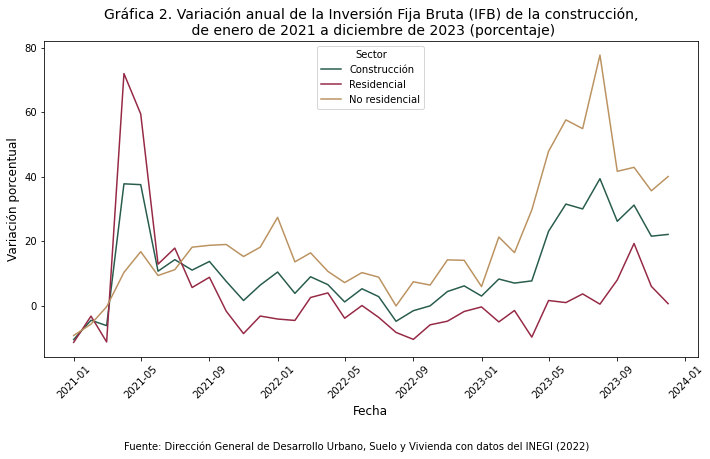

In [130]:
# Datos del DataFrame ifb
fechas = ifb['Fecha']
construccion = ifb['Construcción']
residencial = ifb['Residencial']
no_residencial = ifb['No residencial']

# Crear la gráfica
graf2 = plt.figure(figsize=(10, 6))
plt.plot(fechas, construccion, label='Construcción', color='#285c4d')
plt.plot(fechas, residencial, label='Residencial', color='#962945')
plt.plot(fechas, no_residencial, label='No residencial', color='#bb9361')

# Título y etiquetas de los ejes
plt.title('Gráfica 2. Variación anual de la Inversión Fija Bruta (IFB) de la construcción,\n de enero de 2021 a diciembre de 2023 (porcentaje)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Variación porcentual', fontsize=12)

# Agregar la fuente al pie de la gráfica
plt.figtext(0.5, -0.05, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del INEGI (2022)', ha='center', fontsize=10)

# Mostrar la leyenda
plt.legend(title='Sector', fontsize=10)

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()



#### Valor de la producción en la construcción
- Gráfica 3. Variación anual real del Valor de la producción de la industria de la construcción, de enero a 2023 a diciembre 2023 (porcentaje)

In [131]:
# URL con token del ifb variación anual desestacionalizada
url_co =  "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/736950/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"
url_ed =  "https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/736943/es/0700/false/BIE/2.0/ef8c858c-1f87-6408-5630-fb5496f609bf?type=json"

# Hacer la solicitud HTTP a la URL
response_co = requests.get(url_co)
response_ed = requests.get(url_ed)

# Convertir la respuesta en JSON
data_co = response_co.json()
data_ed = response_ed.json()


In [132]:
# Crear dataframes de pandas a partir de los datos JSON
df_co = pd.DataFrame(data_co["Series"][0]["OBSERVATIONS"])
df_ed = pd.DataFrame(data_ed["Series"][0]["OBSERVATIONS"])

In [133]:
#Usar las columnas necesarias
df_co = df_co[['TIME_PERIOD', 'OBS_VALUE']]
df_ed = df_ed[['TIME_PERIOD', 'OBS_VALUE']]

In [134]:
df_co.info()
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TIME_PERIOD  362 non-null    object
 1   OBS_VALUE    362 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TIME_PERIOD  362 non-null    object
 1   OBS_VALUE    362 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [135]:
#Convertir los tipos de datos
df_co['TIME_PERIOD'] = pd.to_datetime(df_co['TIME_PERIOD'])
df_co['OBS_VALUE'] = pd.to_numeric(df_co['OBS_VALUE'])

df_ed['TIME_PERIOD'] = pd.to_datetime(df_ed['TIME_PERIOD'])
df_ed['OBS_VALUE'] = pd.to_numeric(df_ed['OBS_VALUE'])

C:\Users\hp\AppData\Local\Temp\ipykernel_18740\3838330760.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_co['TIME_PERIOD'] = pd.to_datetime(df_co['TIME_PERIOD'])
C:\Users\hp\AppData\Local\Temp\ipykernel_18740\3838330760.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ed['TIME_PERIOD'] = pd.to_datetime(df_ed['TIME_PERIOD'])


In [136]:
#Obtener datos de las fechas requeridas 2023-12-01 a 2023-01-01
df_co = df_co.loc[(df_co['TIME_PERIOD'] >= '2020-01') & (df_co ['TIME_PERIOD'] <= '2022-01')]
df_ed = df_ed.loc[(df_ed['TIME_PERIOD'] >= '2020-01') & (df_ed ['TIME_PERIOD'] <= '2022-01')]

In [137]:
# Renombrar las columnas en los DataFrames
df_co.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Construcción'}, inplace=True)
df_ed.rename(columns={'TIME_PERIOD': 'Fecha', 'OBS_VALUE': 'Edificación'}, inplace=True)

In [138]:
# Añadir la columna de Edificación al DataFrame df_co
df_co['Edificación'] = df_ed['Edificación']
df_co

,Fecha,Construcción,Edificación
25,2022-01-01,2.19,5.78
26,2021-12-01,2.27,4.62
27,2021-11-01,-1.92,0.67
28,2021-10-01,4.71,5.45
29,2021-09-01,15.01,12.59
30,2021-08-01,12.97,10.03
31,2021-07-01,22.26,17.43
32,2021-06-01,19.32,16.79
33,2021-05-01,59.72,49.08
34,2021-04-01,68.72,51.78


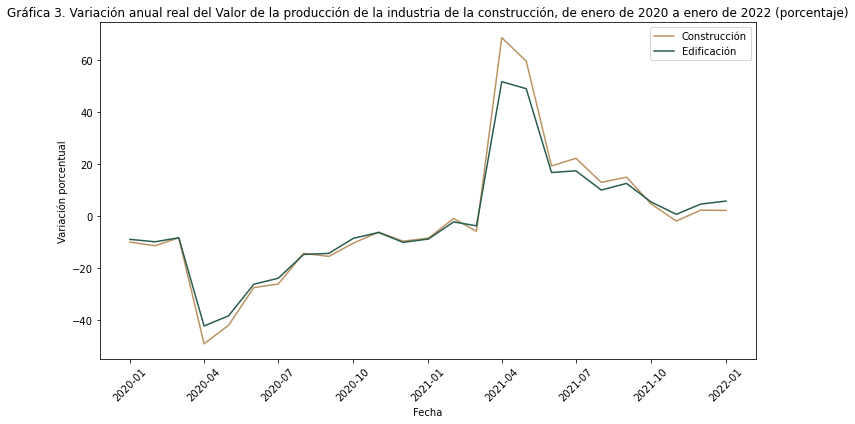

In [139]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar los datos
ax.plot(df_co['Fecha'], df_co['Construcción'], color='#bb9361', label='Construcción')
ax.plot(df_co['Fecha'], df_co['Edificación'], color='#285c4d', label='Edificación')

# Configurar título y etiquetas de los ejes
ax.set_title('Gráfica 3. Variación anual real del Valor de la producción de la industria de la construcción, de enero de 2020 a enero de 2022 (porcentaje)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Variación porcentual')

# Rotar las etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=45)

# Agregar leyenda
ax.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


- Gráfica 4. Variación anual de puestos de trabajo a enero 2023 a diciembre 2023 (porcentaje y variación absoluta)

- Gráfica 5. Horas trabajadas del personal ocupado del sector de la construcción 2023

- Gráfica 6. Remuneraciones reales por persona ocupada 2023

## FINANCIAMIENTOS PARA VIVIENDA	

- Gráfica 7. Total de financiamientos para vivienda, por organismo otorgante enero a noviembre 2023, según organismo otorgante (porcentaje de acciones)

In [140]:
#Url
url="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023/0/0/organismo,modalidad,tipo_credito,destino_credito,anio,mes,sexo,grupo_edad"
r=requests.get(url)
print(r.status_code)

200


In [141]:
df=pd.DataFrame(r.json())
df

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
0,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,5,300939.02
1,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,26278.51
2,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,199788.64
3,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,2,512147.18
4,2023,enero,FOVISSSTE,Viviendas nuevas,Cofinanciamientos y subsidios,Vivienda nueva,Urbano,1,55018.64
...,...,...,...,...,...,...,...,...,...
62012,2023,febrero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,54,81000.00
62013,2023,febrero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,932,1899000.00
62014,2023,febrero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,155,341500.00
62015,2023,febrero,INVI,Viviendas existentes,Credito individual,En arrendamiento,Urbano,153,292500.00


In [142]:
print("Destino de crédito: ",df["destino_credito"].unique())
print("Organismo: ",df["organismo"].unique())
print("Meses disponiblñes ",df["mes"].unique())

Destino de crédito:  ['Vivienda nueva' 'Con disponibilidad de terreno' 'Vivienda existente'
 'Mejoramientos' 'Ampliación' 'Pago de pasivos' 'Autoproducción'
 'Adquisición de suelo' 'En arrendamiento' 'Reconstrucción'
 'Regularización de asentamientos' 'Insumos para vivienda' 'Liquidez']
Organismo:  ['FOVISSSTE' 'INFONAVIT' 'CONAVI' 'SHF (FONDEO)' 'INSUS' 'HABITAT MEXICO'
 'BANJERCITO' 'BANCA (CNBV)' 'INVI']
Meses disponiblñes  ['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre']


In [143]:
print("Meses disponiblñes ",df["mes"].unique())

Meses disponiblñes  ['enero' 'febrero' 'marzo' 'abril' 'mayo' 'junio' 'julio' 'agosto'
 'septiembre' 'octubre' 'noviembre' 'diciembre']


In [144]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
shf=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para shf
shf=shf[shf["organismo"].isin(["SHF (FONDEO)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
shf=shf[(shf["año"] == 2023) & (shf["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
shf

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
35196,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,No distribuido,0,0.00
35197,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,No distribuido,0,1158580.13
35198,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Urbano,12,0.00
35199,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Rural,10,0.00
35200,2023,enero,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Mixto,1,0.00
...,...,...,...,...,...,...,...,...,...
40131,2023,diciembre,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,No distribuido,0,3664593.02
40132,2023,diciembre,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Urbano,3,0.00
40133,2023,diciembre,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Urbano,12,0.00
40134,2023,diciembre,SHF (FONDEO),Mejoramientos,Credito individual,Mejoramientos,Urbano,10,0.00


In [145]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
infonavit=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para infonavit
infonavit=infonavit[infonavit["organismo"].isin(["INFONAVIT"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
infonavit=infonavit[(infonavit["año"] == 2023) & (infonavit["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]
infonavit

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
11673,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Autoproducción,Urbano,1,0.00
11674,2023,enero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Autoproducción,Urbano,1,0.00
11675,2023,febrero,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Autoproducción,Rural,1,0.00
11676,2023,marzo,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Autoproducción,Urbano,1,0.00
11677,2023,abril,INFONAVIT,Viviendas nuevas,Cofinanciamientos y subsidios,Autoproducción,Urbano,1,0.00
...,...,...,...,...,...,...,...,...,...
30332,2023,noviembre,INFONAVIT,Mejoramientos,Cofinanciamientos y subsidios,Mejoramientos,Urbano,1,0.00
30333,2023,noviembre,INFONAVIT,Mejoramientos,Cofinanciamientos y subsidios,Mejoramientos,Mixto,4,0.00
30334,2023,noviembre,INFONAVIT,Mejoramientos,Cofinanciamientos y subsidios,Mejoramientos,Semiurbano,1,0.00
30335,2023,noviembre,INFONAVIT,Mejoramientos,Cofinanciamientos y subsidios,Mejoramientos,Urbano,20,0.00


In [146]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
habitat_mexico=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para habitat_mexico
habitat_mexico=habitat_mexico[habitat_mexico["organismo"].isin(["HABITAT MEXICO"])]
    
# Filtrar el período de enero de 2023 a diciembre de 2023
habitat_mexico=habitat_mexico[(habitat_mexico["año"] == 2023) & (habitat_mexico["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]))]
habitat_mexico

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
40558,2023,agosto,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Semiurbano,20,4467442.60
40559,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Rural,1,47000.00
40560,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,47000.00
40561,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Rural,14,658000.00
40562,2023,septiembre,HABITAT MEXICO,Viviendas nuevas,Credito individual,Autoproducción,Semiurbano,93,3804000.00
...,...,...,...,...,...,...,...,...,...
40635,2023,agosto,HABITAT MEXICO,Mejoramientos,Credito individual,Mejoramientos,Mixto,24,1128000.00
40636,2023,noviembre,HABITAT MEXICO,Mejoramientos,Credito individual,Mejoramientos,Urbano,6,1017000.00
40637,2023,noviembre,HABITAT MEXICO,Mejoramientos,Credito individual,Mejoramientos,Urbano,1,115000.00
40638,2023,diciembre,HABITAT MEXICO,Mejoramientos,Credito individual,Mejoramientos,Urbano,2,460000.00


In [147]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
fovissste=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para fovissste
fovissste=fovissste[fovissste["organismo"].isin(["FOVISSSTE"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
fovissste=fovissste[(fovissste["año"] == 2023) & (fovissste["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre","diciembre"]))]
fovissste

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
8541,2023,enero,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Urbano,1,309376.66
8542,2023,febrero,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Urbano,1,392488.00
8543,2023,febrero,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Urbano,1,353349.97
8544,2023,octubre,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Rural,1,394368.43
8545,2023,octubre,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Semiurbano,2,879464.63
8546,2023,octubre,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Urbano,1,426882.00
8547,2023,noviembre,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Urbano,1,378969.63
8548,2023,diciembre,FOVISSSTE,Mejoramientos,Credito individual,Mejoramientos,Rural,1,300391.05
8549,2023,abril,FOVISSSTE,Mejoramientos,Credito individual,Ampliación,Urbano,1,728606.98
8550,2023,abril,FOVISSSTE,Mejoramientos,Credito individual,Ampliación,Urbano,1,721068.68


In [148]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
cnbv=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para cnbv
cnbv=cnbv[cnbv["organismo"].isin(["BANCA (CNBV)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
cnbv=cnbv[(cnbv["año"] == 2023) & (cnbv["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre","diciembre"]))]
cnbv

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto
46059,2023,enero,BANCA (CNBV),Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,163804.00
46060,2023,enero,BANCA (CNBV),Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,258576.00
46061,2023,enero,BANCA (CNBV),Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,21776.00
46062,2023,enero,BANCA (CNBV),Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,126662.00
46063,2023,enero,BANCA (CNBV),Viviendas nuevas,Credito individual,Autoproducción,Urbano,1,131726.00
...,...,...,...,...,...,...,...,...,...
57048,2023,diciembre,BANCA (CNBV),Mejoramientos,Credito individual,Mejoramientos,Urbano,2,222225.00
57049,2023,diciembre,BANCA (CNBV),Mejoramientos,Credito individual,Mejoramientos,Semiurbano,1,133108.00
57050,2023,diciembre,BANCA (CNBV),Mejoramientos,Credito individual,Mejoramientos,Urbano,11,10279195.00
57051,2023,diciembre,BANCA (CNBV),Mejoramientos,Credito individual,Mejoramientos,Urbano,1,1200000.00


In [149]:
#Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
banjercito=df[df["destino_credito"].isin(["Autoproducción","Ampliación","Reconstrucción","Mejoramientos"])]

#Filtrar solo para banjercito
banjercito=banjercito[banjercito["organismo"].isin(["BANJERCITO"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
banjercito=banjercito[(banjercito["año"] == 2023) & (banjercito["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre","diciembre"]))]
banjercito

,año,mes,organismo,modalidad,tipo_credito,destino_credito,zona,acciones,monto


In [150]:
# Crear un df para pegar los resultados generales
autoprod=pd.concat([shf,infonavit,habitat_mexico,fovissste,cnbv,banjercito])
print("El total de financiamientos de autoproducción es de "+str(autoprod["acciones"].sum())+" financiamientos equivalentes a "+str(autoprod["monto"].sum())+" pesos")
autoprod.groupby(["organismo"]).agg({"acciones":"sum","monto":"sum"}) 

El total de financiamientos de autoproducción es de 193052 financiamientos equivalentes a 11138325225.89 pesos


,acciones,monto
organismo,,
BANCA (CNBV),46155,5728262293.00
FOVISSSTE,18,7534382.68
HABITAT MEXICO,905,51990762.41
INFONAVIT,106857,1082057128.58
SHF (FONDEO),39117,4268480659.22


In [151]:
# Calcular el total general de monto
total_general_monto = autoprod["monto"].sum()
total_general_monto

11138325225.89

In [152]:
# Definir colores personalizados
colores = ['#b38e5d', '#9d2449', '#d4c19c', '#621132', '#13322b', '#285c4d']

# Crear gráfico de anillo
autoprod_total_por_organismo.loc["BANJERCITO"] = [0, 0, 0]
plt.figure(figsize=(8, 6))

# Destacar cada porción por separado
explode = (0.03, 0.03, 0.03, 0.03, 0.03, 0.03)

plt.pie(autoprod_total_por_organismo["monto"], labels=autoprod_total_por_organismo.index, autopct='%0.1f%%', colors=colores, startangle=90, explode=explode)

# Añadir título
plt.title('Gráfica 7. Total de financiamientos para vivienda, por organismo otorgante enero a noviembre 2023, según organismo otorgante (porcentaje de acciones)', fontsize=12, loc='center')
# Añadir fuente
plt.figtext(0.5, 0.01, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2022)', horizontalalignment='center', fontsize=10)

# Añadir leyenda
plt.legend(autoprod_total_por_organismo.index, loc="center left", bbox_to_anchor=(1, 0.5))

# Mostrar el gráfico
plt.axis("equal")
plt.show()

NameError: name 'autoprod_total_por_organismo' is not defined

- Gráfica 8. Financiamientos de vivienda, por organismo otorgante y modalidad enero a diciembre a 2023 (porcentaje de acciones)

In [ ]:
# Crear DataFrame
df = pd.DataFrame(r.json())

# Definir las variables de destino_credito que se agruparán como 'Otros programas'
otros_programas = ['Con disponibilidad de terreno', 'Ampliación', 'Pago de pasivos', 'Autoproducción',
                   'Adquisición de suelo', 'En arrendamiento', 'Reconstrucción', 'No especificado',
                   'Regularización de asentamientos', 'Insumos para vivienda', 'Liquidez']

# Agrupar las variables de destino_credito según la clasificación especificada
df['destino_credito'] = df['destino_credito'].apply(lambda x: 'Otros programas' if x in otros_programas else x)
print("Destino de crédito: ",df["destino_credito"].unique())


In [ ]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
shf = df[df["organismo"].isin(["SHF (FONDEO)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
shf = shf[(shf["año"] == 2023) & (shf["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]

# Calcular el total de acciones
total_acciones = shf["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = shf.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 


In [ ]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
infonavit = df[df["organismo"].isin(["INFONAVIT"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
infonavit = infonavit[(infonavit["año"] == 2023) & (infonavit["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]

# Calcular el total de acciones
total_acciones = infonavit["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = infonavit.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 


In [ ]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
habitat_mexico = df[df["organismo"].isin(["HABITAT MEXICO"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
habitat_mexico = habitat_mexico[(habitat_mexico["año"] == 2023) & (habitat_mexico["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]

# Calcular el total de acciones
total_acciones = habitat_mexico["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = habitat_mexico.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 

In [ ]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
fovissste = df[df["organismo"].isin(["FOVISSSTE"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
fovissste = fovissste[(fovissste["año"] == 2023) & (fovissste["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]

# Calcular el total de acciones
total_acciones = fovissste["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = fovissste.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 

In [ ]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
cnbv = df[df["organismo"].isin(["BANCA (CNBV)"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
cnbv = cnbv[(cnbv["año"] == 2023) & (cnbv["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]

# Calcular el total de acciones
total_acciones = cnbv["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = cnbv.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 

In [ ]:
# Filtrar por destino de credito si es Autoproducción, Ampliación, Reconstrucción y Mejoramiento
banjercito = df[df["organismo"].isin(["BANJERCITO"])]

# Filtrar el período de enero de 2023 a noviembre de 2023
banjercito = banjercito[(banjercito["año"] == 2023) & (banjercito["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]

# Calcular el total de acciones
total_acciones = banjercito["acciones"].sum()

# Calcular el porcentaje de destino_credito según el número de acciones
porcentaje_destino_credito = banjercito.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
porcentaje_destino_credito 

In [ ]:
# Colores personalizados
colores = ['#b38e5d', '#d4c19c', '#9d2449', '#621132']

# Crear DataFrames con los porcentajes para cada organismo y destino de crédito
organismos = ["SHF (FONDEO)", "INFONAVIT", "HABITAT MEXICO", "FOVISSSTE", "BANCA (CNBV)", "BANJERCITO"]
dataframes = {}

for organismo in organismos:
    df_organismo = df[df["organismo"] == organismo]
    df_organismo = df_organismo[(df_organismo["año"] == 2023) & (df_organismo["mes"].isin(["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre"]))]
    total_acciones = df_organismo["acciones"].sum()
    porcentaje_destino_credito = df_organismo.groupby("destino_credito")["acciones"].sum() / total_acciones * 100
    dataframes[organismo] = porcentaje_destino_credito

# Crear gráficos de pastel en una sola imagen
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Gráfica 9. Financiamiento promedio de vivienda, por organismo otorgante y modalidad enero a noviembre 2023 (porcentaje de acciones)', fontsize=16, y=1.05)
fig.tight_layout(pad=5.0)

legend_labels = None

# Crear gráficos y leyenda para los organimos con sus colores correspondientes
for idx, (organismo, porcentajes) in enumerate(dataframes.items()):
    ax = axs[idx // 3][idx % 3]
    porcentajes.plot(kind="pie", ax=ax, autopct='%1.1f%%', startangle=90, colors=colores, legend=False)
    ax.set_title(organismo)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    
    if idx == 0:
        legend_labels = porcentajes.index

# Añadir leyenda para los tipos de modalidades de crédito
fig.legend(legend_labels, loc='lower center', ncol=len(legend_labels), fontsize=10, bbox_to_anchor=(0.5, -0.1))

# Añadir fuente
plt.figtext(0.5, 0.01, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2022)', horizontalalignment='center', fontsize=10)

plt.show()


In [ ]:
# Calcula los promedios
prm_shf = shf["monto"].mean()
prm_infonavit = infonavit["monto"].mean()
prm_habitat_mexico = habitat_mexico["monto"].mean()
prm_fovissste = fovissste["monto"].mean()
prm_cnbv = cnbv["monto"].mean()
prm_banjercito = banjercito["monto"].mean()

# Convierte los valores de promedio en Series
prm_shf_series = pd.Series(prm_shf, name='SHF')
prm_infonavit_series = pd.Series(prm_infonavit, name='INFONAVIT')
prm_habitat_mexico_series = pd.Series(prm_habitat_mexico, name='Habitat México')
prm_fovissste_series = pd.Series(prm_fovissste, name='FOVISSSTE')
prm_cnbv_series = pd.Series(prm_cnbv, name='CNBV')
prm_banjercito_series = pd.Series(prm_banjercito, name='Banjercito')

# Concatena las Series
fin_prom = pd.concat([prm_shf_series, prm_infonavit_series, prm_habitat_mexico_series, prm_fovissste_series, prm_cnbv_series, prm_banjercito_series], axis=1)

# Muestra el resultado
fin_prom

#Obtener los promedios por las columnas que hay 
prm_shf = shf["acciones"].mean()
prm_infonavit = infonavit["acciones"].mean()
prm_habitat_mexico = habitat_mexico["acciones"].mean()
prm_fovissste = fovissste["monto"].mean()
prm_cnbv = cnbv["monto"].mean()
prm_banjercito = banjercito["monto"].mean()


In [ ]:
shf.describe()

In [ ]:
# Definir los datos para la gráfica
organismos = df_financiamientos["organismo"]
promedios = df_financiamientos["promedio"]

# Crear la gráfica de línea
plt.figure(figsize=(10, 6))
plt.plot(organismos, promedios, marker='o', color='#9D7C51', linestyle='-')

# Agregar etiquetas de cantidad en cada organismo
for i, txt in enumerate(promedios):
    plt.annotate("{:,.2f}".format(txt), (organismos[i], promedios[i]), textcoords="offset points", xytext=(0,10), ha='center')

# Personalizar la gráfica
plt.title('Gráfica 9. Financiamientos promedio para vivienda, por organismo otorgante enero a diciembre a 2023, según organismo otorgante')
plt.xlabel('Organismo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(True)

# Agregar la fuente
plt.figtext(0.5, 0.005, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', horizontalalignment='center', fontsize=8)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:
# Calcular los montos promedio por destino de crédito
prom_destcred_shf = shf["monto"].mean()
prom_destcred_inf = infonavit.groupby("destino_credito")["monto"].mean()
prom_destcred_hab = habitat_mexico.groupby("destino_credito")["monto"].mean()
prom_destcred_fov = fovissste.groupby("destino_credito")["monto"].mean()
prom_destcred_cnbv = cnbv.groupby("destino_credito")["monto"].mean()
prom_destcred_banj = banjercito.groupby("destino_credito")["monto"].mean()

In [ ]:
import matplotlib.pyplot as plt

# Paleta de colores
colores = ['#b38e5d', '#d4c19c', '#9d2449', '#621132']

# Datos de los montos promedio por destino de crédito
dataframes = {
    "shf": prom_destcred_shf,
    "infonavit": prom_destcred_inf,
    "habitat_mexico": prom_destcred_hab,
    "fovissste": prom_destcred_fov,
    "cnbv": prom_destcred_cnbv,
    "banjercito": prom_destcred_banj
}

# Crear una figura con subgráficas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Recorrer los dataframes y crear una gráfica para cada uno
for i, (nombre, prom_dest_cred) in enumerate(dataframes.items()):
    # Obtener la subgráfica correspondiente
    ax = axes[i // 3, i % 3]
    
    # Crear la gráfica de barras con la paleta de colores
    prom_dest_cred.plot(kind='bar', ax=ax, color=colores)
    
    # Añadir cantidad encima de cada barra
    for index, value in enumerate(prom_dest_cred):
        ax.text(index, value, "{:.2f}".format(value), ha='center', va='bottom', fontsize=8)
    
    # Añadir título y etiquetas
    ax.set_title(nombre.upper())
    ax.set_xlabel('Destino de Crédito')
    ax.set_ylabel('Monto Promedio')

# Añadir título general
    fig.suptitle('Gráfica 10. Financiamientos promedio de vivienda, por organismo otorgante y modalidad enero a noviembre 2023 ', fontsize=16)
# Añadir fuente
plt.figtext(0.5, 0.01, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2022)', horizontalalignment='center', fontsize=10)


# Ajustar espaciado y mostrar la gráfica
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [ ]:
# Obtención de los datos por sexo y rangos de edad de financiamientos de vivienda
url1="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/0/0/organismo,genero,rango_edad,anio,mes"
r=requests.get(url1)
print(r.status_code)

In [ ]:
#Crear dataframe 
df1=pd.DataFrame(r.json())

# Filtrar el DataFrame para excluir 'No disponible' en 'grupo_edad'
df_nd = df1[df1['grupo_edad'] != 'No disponible']
df_nd

In [ ]:
# Calcular el total de financiamientos por grupo de edad y sexo (excluyendo 'No disponible')
total_financiamientos = df_nd.groupby(['grupo_edad', 'sexo','organismo'])['acciones'].sum()

# Reorganizar los datos para tener grupos de edad como barras y separados por sexo
total_financiamientos = total_financiamientos.unstack()
total_financiamientos

In [ ]:
# Definir la paleta de colores personalizada
colores = ['#691c32', '#9f2241', '#c47b91', '#10312b', '#235b4e', '#bc955c', '#ddc9a3', '#6f7271', '#98989a']

# Reorganizar los datos para dividir primero por sexo y luego por grupo de edad
total_financiamientos = total_financiamientos.swaplevel().sort_index()

# Graficar los datos con la paleta de colores personalizada
fig, ax = plt.subplots(figsize=(12, 6))
total_financiamientos.plot(kind='bar', ax=ax, color=colores)

plt.xlabel('Sexo y Grupo de Edad')
plt.ylabel('Cantidad de Acciones')
plt.title('Gráfica 11. Total de financiamientos de vivienda, por organismo otorgante y sexo 2023 (cantidad de acciones)')
plt.figtext(0.5, 0.0, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', horizontalalignment='center', fontsize=10)
plt.legend(title='Organismo Otorgante')
plt.xticks(rotation=45, ha='right')

# Formatear ejes y agregar cantidades en cada barra
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate('{:,.0f}'.format(y),
                (x, y),
                ha='center',
                va='bottom',
                fontsize=8,
                color='white',
                weight='bold',
                xytext=(0, 5),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.2', fc=p.get_facecolor(), alpha=0.7),
                arrowprops=dict(arrowstyle='->', color='white', lw=0.5))

plt.tight_layout()
plt.show()

In [ ]:
# Calcular los porcentajes en función de las filas
total_financiamientos_porcentaje = total_financiamientos.div(total_financiamientos.sum(axis=1), axis=0) * 100
total_financiamientos_porcentaje

In [ ]:
# Definir la paleta de colores personalizada
colores = ['#691c32', '#9f2241', '#c47b91', '#10312b', '#235b4e', '#bc955c', '#ddc9a3', '#6f7271', '#98989a']

# Reorganizar los datos para dividir primero por sexo y luego por grupo de edad
total_financiamientos_porcentaje = total_financiamientos_porcentaje.swaplevel().sort_index()

# Graficar los datos con la paleta de colores personalizada
fig, ax = plt.subplots(figsize=(12, 6))
total_financiamientos_porcentaje.plot(kind='bar', ax=ax, color=colores, width=0.8)

plt.xlabel('Sexo y Grupo de Edad')
plt.ylabel('Porcentaje de Acciones')
plt.title('Gráfica 12. Financiamientos de vivienda según sexo y organismo otorgante 2023 (porcentaje de acciones)', horizontalalignment='center', fontsize=10)
plt.figtext(0.5, 0.002, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', horizontalalignment='center', fontsize=10)
plt.legend(title='Organismo Otorgante')
plt.xticks(rotation=45, ha='right')

# Formatear ejes
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

# Mostrar los porcentajes en cuadritos encima de las barras
for p in ax.patches:
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate('{:.1f}%'.format(y),
                (x, y),
                ha='center',
                va='bottom',
                fontsize=8,
                color='white',
                weight='bold',
                xytext=(0, 5),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.2', fc=p.get_facecolor(), ec='none', alpha=0.7),
                arrowprops=dict(arrowstyle='-[, widthB={}, lengthB=1'.format(p.get_width()), lw=1, color=p.get_facecolor()))

plt.tight_layout()
plt.show()



In [ ]:
# Obtención de los datos por sexo y rangos de edad de financiamientos de vivienda
url2="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2023,2023/0/0/organismo,genero,rango_salarial,anio,mes"
r=requests.get(url2)
print(r.status_code)

In [ ]:
df2=pd.DataFrame(r.json())
df2

In [ ]:
# Ver los rangos salariales: 
print("Rangos Salariales: ",df2["rango_salarial"].unique())   

In [ ]:
# Filtrar el DataFrame para excluir 'No disponible' en 'rango_salarial'
df_nd = df2[(df2['rango_salarial'] != 'No disponible') & (df2['sexo'] != 'No disponible')]

total_financiamientos = df_nd.groupby(['rango_salarial', 'sexo'])['acciones'].sum()
total_financiamientos

In [ ]:
# Establecer el formato de localización en español
locale.setlocale(locale.LC_ALL, 'es_ES.UTF-8')

# Filtrar el DataFrame para excluir 'No disponible' en 'rango_salarial'
df_nd = df2[(df2['rango_salarial'] != 'No disponible') & (df2['sexo'] != 'No disponible')]

total_financiamientos = df_nd.groupby(['rango_salarial', 'sexo'])['acciones'].sum()

# Reorganizar los datos para tener 'rango_salarial' como barras y separados por 'sexo'
total_financiamientos = total_financiamientos.unstack()

# Definir colores personalizados para los sexos
colors = {'Hombre': '#b38e5d', 'Mujer': '#d4c19c'}

# Crear un gráfico de barras con colores personalizados
ax = total_financiamientos.plot(kind='bar', figsize=(10, 6), color=[colors[col] for col in total_financiamientos.columns])

# Añadir cantidad de acciones a cada barra
for p in ax.patches:
    ax.annotate(locale.format_string('%d', p.get_height(), grouping=True), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Añadir etiquetas y título
plt.title('Gráfica 13. Total de acciones para vivienda por sexo y rango de ingresos, 2023 (cantidad de acciones)',horizontalalignment='center', fontsize=14)
plt.xlabel('Grupo de Ingresos')
plt.ylabel('Cantidad de Acciones')
plt.xticks(rotation=0, ha='center')
plt.figtext(0.5, 0.002, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', horizontalalignment='center', fontsize=12)

# Mostrar el gráfico
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

In [ ]:
# Filtrar el DataFrame para excluir 'No disponible' en 'grupo_edad'
df_nd = df1[df1['grupo_edad'] != 'No disponible']
df_nd

total_acciones = df_nd.groupby(['grupo_edad', 'sexo'])['acciones'].sum()
total_acciones

In [ ]:
# Definir colores personalizados para los sexos
colors = {'Hombre': '#b38e5d', 'Mujer': '#d4c19c'}

# Crear un gráfico de barras con colores personalizados
ax = total_acciones_df.plot(kind='bar', figsize=(10, 6), color=[colors[col] for col in total_acciones_df.columns])

# Añadir cantidad de acciones a cada barra y formatear los valores con separación de miles
for p in ax.patches:
    ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Formatear el eje y con separación de miles
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Añadir etiquetas y título
plt.title('Gráfica 14. Total de financiamientos de vivienda otorgado por rango de edad y sexo 2023 (cantidad de acciones)', horizontalalignment='center', fontsize=14)
plt.xlabel('Grupo de Edad')
plt.ylabel('Cantidad de Acciones')
plt.xticks(rotation=45, ha='right')
plt.figtext(0.5, 0.002, 'Fuente: Dirección General de Desarrollo Urbano, Suelo y Vivienda con datos del SNIIV (2023)', horizontalalignment='center', fontsize=12)


# Mostrar el gráfico
plt.legend(title='Sexo')
plt.tight_layout()
plt.show()

In [ ]:
#Tabla 1  

In [ ]:
# Obtención de los datos por sexo y rangos de edad de financiamientos de vivienda
url3="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2022,2023/00/0/anio,mes"
r=requests.get(url3)
print(r.status_code)

In [ ]:
df3=pd.DataFrame(r.json())
df3

In [ ]:
# Obtención de los datos por sexo y rangos de edad de financiamientos de vivienda
url3="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2022,2023/00/0/anio,mes"
r=requests.get(url3)
print(r.status_code)

In [ ]:
df3=pd.DataFrame(r.json())

In [ ]:
# Filtrar datos para el año 2022
mes_2022 = df3[df3['año'] == 2022]
mes_2022 

In [ ]:
# Filtrar datos para el año 2023
mes_2023 = df3[df3['año'] == 2023]
mes_2023


In [ ]:
# Filtrar datos para el año 2022
entidad_2022 = entidad.loc[entidad['año'] == 2022]

# Filtrar datos para el año 2023
entidad_2023 = entidad.loc[entidad['año'] == 2023]

# Mostrar los datos para el año 2022
print("Datos para el año 2022:")
print(entidad_2022)

# Mostrar los datos para el año 2023
print("Datos para el año 2023:")
print(entidad_2023)

In [ ]:
# Filtrar datos para el año 2022
entidad_2022 = entidad.loc[entidad['año'] == 2022]
entidad_2022 = entidad_2022.rename(columns={'estado': 'estado_2022', 'acciones': 'acciones_2022'})

# Filtrar datos para el año 2023
entidad_2023 = entidad.loc[entidad['año'] == 2023]
entidad_2023 = entidad_2023.rename(columns={'estado': 'estado_2023', 'acciones': 'acciones_2023'})

# Combinar los datos en una misma tabla
entidad_combinada = entidad_2022.merge(entidad_2023, how='outer', left_on='estado_2022', right_on='estado_2023')

# Mostrar la tabla combinada
print("Datos combinados para el año 2022 y 2023:")
print(entidad_combinada)

In [ ]:
entidad = participaciones(consulta(['anio','estado']),'acciones',['año'])
#Porcentaje promedio por entidad
entidad = entidad.groupby('estado')['percentage'].mean().reset_index()
entidad['distr'] = round((entidad['percentage'] / 100) * limite_superior,0)
entidad["distr"].sum()

#Porcentaje promedio por entidad
entidad = entidad.groupby('estado')['percentage'].mean().reset_index()
entidad['distr'] = round((entidad['percentage'] / 100) * limite_superior,0)
print(entidad["distr"].sum())

In [ ]:
url3="https://sniiv.sedatu.gob.mx/api/CuboAPI/GetFinanciamiento/2022,2023/00/0/anio,estado,tipo_credito,destino_credito"
r=requests.get(url3)
print(r.status_code)

df3=pd.DataFrame(r.json())
print(df3)

#Consulta por entidad federativa
entidad = consulta(df3, ['anio','estado'], 'acciones', ['año'])
#Porcentaje promedio por entidad
entidad = entidad.groupby('estado')['percentage'].mean().reset_index()
entidad['distr'] = round((entidad['percentage'] / 100) * limite_superior,0)
print(entidad["distr"].sum())

## 3) PROGRAMAS SOCIALES DEL RAMO 15 CON INFORMACIÓN DISPONIBLE EN EL SNIIV	

#### Estadísticas Generales
- Tabla 8. Tabla comparativa de los subsidios otorgados por mes 2023  (en acciones)

- Tabla 9. Tabla comparativa de los subsidios otorgados por mes 2023 (en pesos)

- Gráfica 14. Total de subsidios para vivienda otorgados por el ramo 15, según programa, 2023 (porcentaje)

- Gráfica 15. Subsidios para vivienda otorgados por el ramo 15, según programa y sexo, 2023 (porcentaje)	

- Gráfica 16. Total de acciones otorgadas mediante el PRAH, mensual  2023.	

In [217]:
# Obtención de los datos
url_PRAH = "https://sniiv.sedatu.gob.mx/api/CuboAPI/GetInsus/2022,2023/00/0/anio,mes,genero"
r = requests.get(url_PRAH)

# Crear DataFrame a partir de los datos JSON
df_PRAH = pd.DataFrame(r.json())

# Mapeo de nombres de meses a números
meses_numeros = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

# Convertir la columna 'mes' de nombres de meses a números
df_PRAH['mes_numero'] = df_PRAH['mes'].str.lower().map(meses_numeros)

# Crear nueva columna de fecha utilizando 'anio' y 'mes_numero'
df_PRAH['fecha'] = pd.to_datetime({'year': df_PRAH['año'], 'month': df_PRAH['mes_numero'], 'day': 1})

# Eliminar las columnas 'anio', 'mes' y 'mes_numero'
df_PRAH.drop(['año', 'mes', 'mes_numero'], axis=1, inplace=True)

# Reordenar el DataFrame para que 'fecha' esté en la primera posición
df_PRAH = df_PRAH[['fecha'] + [col for col in df_PRAH.columns if col != 'fecha']]

# Ordenar el DataFrame por la columna de fecha
df_PRAH = df_PRAH.sort_values(by='fecha')

# Obtener datos de las fechas requeridas 2023-01 a 2023-12
df_PRAH = df_PRAH.loc[(df_PRAH['fecha'] >= '2023-01') & (df_PRAH['fecha'] < '2023-12')]


# Mostrar información sobre el DataFrame
df_PRAH


,fecha,sexo,acciones,monto
41,2023-01-01,Mujer,54,729000.00
39,2023-01-01,Hombre,43,580500.00
0,2023-02-01,Mujer,94,1269000.00
18,2023-02-01,Hombre,106,1431000.00
27,2023-03-01,Hombre,139,1876500.00
9,2023-03-01,Mujer,161,2173500.00
2,2023-04-01,Hombre,126,1701000.00
44,2023-04-01,Mujer,174,2349000.00
23,2023-05-01,Mujer,273,3685500.00
46,2023-05-01,Hombre,227,3064500.00


- Gráfica 17. Monto total de apoyos otorgados mediante el PRAH mensual 2023 (en pesos)	

## 4) OFERTA DE VIVIENDA
- Gráfica 18. Tiempo de venta promedio (días) 2023.

#### Perímetros de contención urbana y valor de la vivienda	
- Gráfica 19. Registro de vivienda según su Perímetro de Contención Urbana y el valor de la vivienda 2023 (porcentaje)

#### Registro de Viviendas	
- Figura 6. Registro de viviendas acumuladas según entidad federativa 2023

- Tabla 10. Registro de viviendas acumuladas según entidad federativa 2023


#### Inventario de Vivienda
- Tabla 11. Inventario de vivienda acumulado mensual 2023 según entidad federativa


- Figura 7. Inventario de vivienda acumulado según entidad federativa, mensual 2023.

- Tabla 12. Inventario por situación de avance (Miles de viviendas)

## 5) ÍNDICE DE PRECIOS SOCIEDAD HIPOTECARIA FEDERAL 